0    99.827251
1     0.172749
Name: Class, dtype: float64


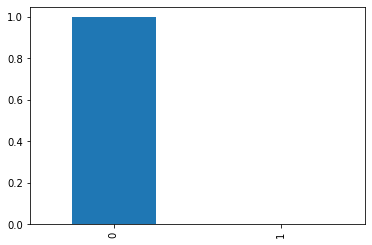

In [1]:
import pandas as pd 
import warnings

warnings.filterwarnings(action='ignore')

# dataset : Kaggle의 Credit Card Fraud Detection의 creditcard.csv 
df = pd.read_csv('datasets/creditcard.csv')

# Class 별 데이터분포
df.Class.value_counts(normalize=True).plot(kind='bar')
print(df.Class.value_counts(normalize=True)*100)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Original dataset으로 독립변수(X)와 종속변수(y) 지정
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

# Original dataset에 대한 training set과 test set 구분 (3:1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=10)

In [3]:
# imblearn(imbalanced data 문제해결을 위한 패키지) import
from imblearn.over_sampling import SMOTE

# SMOTE 모델 설정
smote = SMOTE(random_state=0)

# SMOTE 기법에 의한 Oversampling 진행
X_over,y_over = smote.fit_sample(X,y)

print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X.shape, y.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_over.shape, y_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_over).value_counts())

# Oversampling dataset에 대한 training set과 test set 구분 (3:1)
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over, y_over, test_size=0.25, random_state=10)

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (284807, 30) (284807,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (568630, 30) (568630,)
SMOTE 적용 후 레이블 값 분포: 
 1    284315
0    284315
Name: Class, dtype: int64


In [23]:
# 모델링 및 학습/검증
def f_model_fit(cls, model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    f_metrics(cls, y_test,pred)
    
# 분류 성능평가 지표
def f_metrics(cls, y_test,pred):
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    print(cls + '정확도 : {0:.3f}, 정밀도 : {1:.3f}, 재현율 : {2:.3f}, f1-score : {3:.3f}'.format(accuracy, precision, recall, f1))

In [24]:
# 분석기법 : Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
%time f_model_fit('Logistic Regression(SMOTE적용 전) -> ', lr, X_train, X_test, y_train, y_test)
%time f_model_fit('Logistic Regression(SMOTE적용 후) -> ', lr, X_train_over, X_test_over, y_train_over, y_test_over)

Logistic Regression(SMOTE적용 전) -> 정확도 : 0.999, 정밀도 : 0.730, 재현율 : 0.736, f1-score : 0.733
Wall time: 2.1 s
Logistic Regression(SMOTE적용 후) -> 정확도 : 0.974, 정밀도 : 0.983, 재현율 : 0.964, f1-score : 0.973
Wall time: 5.27 s


In [25]:
# test data로 예측(y_hat_over)
y_hat_over = lr.predict(X_test_over)

# 모형 성능 평가 - Confusion Matrix 계산
from sklearn import metrics
lr_matrix = metrics.confusion_matrix(y_test_over, y_hat_over)
lr_matrix

array([[69889,  1201],
       [ 2551, 68517]], dtype=int64)

In [26]:
# 모형 성능 평가 - 평가지표 계산
lr_report = metrics.classification_report(y_test_over, y_hat_over)
print(lr_report)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     71090
           1       0.98      0.96      0.97     71068

    accuracy                           0.97    142158
   macro avg       0.97      0.97      0.97    142158
weighted avg       0.97      0.97      0.97    142158



In [27]:
# 분석기법 : Decision_tree Classification
from sklearn.tree import DecisionTreeClassifier  # 의사결정트리 기법에 관련된 모듈

decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)
%time f_model_fit('Decision_tree(SMOTE적용 전) -> ', decision_tree, X_train, X_test, y_train, y_test)
%time f_model_fit('Decision_tree(SMOTE적용 후) -> ', decision_tree, X_train_over, X_test_over, y_train_over, y_test_over)

Decision_tree(SMOTE적용 전) -> 정확도 : 0.999, 정밀도 : 0.896, 재현율 : 0.785, f1-score : 0.837
Wall time: 5.42 s
Decision_tree(SMOTE적용 후) -> 정확도 : 0.964, 정밀도 : 0.982, 재현율 : 0.946, f1-score : 0.963
Wall time: 10.3 s


In [30]:
# test data로 예측(y_hat_over)
y_hat_over = decision_tree.predict(X_test_over)

# 모형 성능 평가 - Confusion Matrix 계산
from sklearn import metrics
decision_tree_matrix = metrics.confusion_matrix(y_test_over, y_hat_over)
decision_tree_matrix

array([[69829,  1261],
       [ 3855, 67213]], dtype=int64)

In [29]:
# 모형 성능 평가 - 평가지표 계산
decision_tree_report = metrics.classification_report(y_test_over, y_hat_over)
print(decision_tree_report)

              precision    recall  f1-score   support

           0       0.95      0.98      0.96     71090
           1       0.98      0.95      0.96     71068

    accuracy                           0.96    142158
   macro avg       0.96      0.96      0.96    142158
weighted avg       0.96      0.96      0.96    142158



In [31]:
# 분석기법 : Random_forest Classification
from sklearn.ensemble import RandomForestClassifier  # 랜덤포리스트 기법에 관련된 모듈

random_forest = RandomForestClassifier(n_estimators=20, random_state=0)
%time f_model_fit('Random_forest(SMOTE적용 전) -> ', random_forest, X_train, X_test, y_train, y_test)
%time f_model_fit('Random_forest(SMOTE적용 후) -> ', random_forest, X_train_over, X_test_over, y_train_over, y_test_over)

Random_forest(SMOTE적용 전) -> 정확도 : 1.000, 정밀도 : 0.960, 재현율 : 0.802, f1-score : 0.874
Wall time: 32.1 s
Random_forest(SMOTE적용 후) -> 정확도 : 1.000, 정밀도 : 1.000, 재현율 : 1.000, f1-score : 1.000
Wall time: 1min 11s


In [32]:
# test data로 예측(y_hat_over)
y_hat_over = random_forest.predict(X_test_over)

# 모형 성능 평가 - Confusion Matrix 계산
from sklearn import metrics
random_forest_matrix = metrics.confusion_matrix(y_test_over, y_hat_over)
random_forest_matrix

array([[71077,    13],
       [    3, 71065]], dtype=int64)

In [33]:
# 모형 성능 평가 - 평가지표 계산
random_forest_report = metrics.classification_report(y_test_over, y_hat_over)
print(random_forest_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71090
           1       1.00      1.00      1.00     71068

    accuracy                           1.00    142158
   macro avg       1.00      1.00      1.00    142158
weighted avg       1.00      1.00      1.00    142158



In [8]:
# 분석기법 : Xgboost Classification
import xgboost as xgb # xgboost 기법에 관련된 모듈

gbm = xgb.XGBClassifier(max_depth=4, n_estimators=300, learning_rate=0.05, eval_metric='logloss')
%time f_model_fit('XGBoost(SMOTE적용 전) -> ', gbm, X_train, X_test, y_train, y_test)
%time f_model_fit('XGBoost(SMOTE적용 후) -> ', gbm, X_train_over, X_test_over, y_train_over, y_test_over)

XGBoost(SMOTE적용 전) -> 정확도 : 1.000, 정밀도 : 0.962, 재현율 : 0.835, f1-score : 0.894
Wall time: 49.2 s
XGBoost(SMOTE적용 후) -> 정확도 : 0.997, 정밀도 : 0.997, 재현율 : 0.997, f1-score : 0.997
Wall time: 1min 48s


In [34]:
# test data로 예측(y_hat_over)
y_hat_over = gbm.predict(X_test_over)

# 모형 성능 평가 - Confusion Matrix 계산
from sklearn import metrics
gbm_matrix = metrics.confusion_matrix(y_test_over, y_hat_over)
gbm_matrix

array([[70912,   178],
       [  200, 70868]], dtype=int64)

In [35]:
# 모형 성능 평가 - 평가지표 계산
gbm_report = metrics.classification_report(y_test_over, y_hat_over)
print(gbm_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71090
           1       1.00      1.00      1.00     71068

    accuracy                           1.00    142158
   macro avg       1.00      1.00      1.00    142158
weighted avg       1.00      1.00      1.00    142158



In [9]:
# 분석기법 : LightGBM Classification
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(n_estimators=1000,num_leaves=64,n_jobs=-1,boost_from_average=False)
%time f_model_fit('Lightgbm(SMOTE적용 전) -> ', lgb, X_train, X_test, y_train, y_test)
%time f_model_fit('Lightgbm(SMOTE적용 후) -> ', lgb, X_train_over, X_test_over, y_train_over, y_test_over)

Lightgbm(SMOTE적용 전) -> 정확도 : 1.000, 정밀도 : 0.952, 재현율 : 0.826, f1-score : 0.885
Wall time: 8.24 s
Lightgbm(SMOTE적용 후) -> 정확도 : 1.000, 정밀도 : 1.000, 재현율 : 1.000, f1-score : 1.000
Wall time: 24 s


In [36]:
# test data로 예측(y_hat_over)
y_hat_over = lgb.predict(X_test_over)

# 모형 성능 평가 - Confusion Matrix 계산
from sklearn import metrics
lgb = metrics.confusion_matrix(y_test_over, y_hat_over)
lgb

array([[71074,    16],
       [    0, 71068]], dtype=int64)

In [37]:
# 모형 성능 평가 - 평가지표 계산
lgb_report = metrics.classification_report(y_test_over, y_hat_over)
print(lgb_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71090
           1       1.00      1.00      1.00     71068

    accuracy                           1.00    142158
   macro avg       1.00      1.00      1.00    142158
weighted avg       1.00      1.00      1.00    142158

